# Introduction

- Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

## 2 - Download the Data

- Download the data

In [2]:
BASE_PATH = os.path.join(os.getcwd(), "FORTH_TRACE_DATASET-master\FORTH_TRACE_DATASET-master")

def load_data(participant_id, device_id, base_path=BASE_PATH):
    filepath = os.path.join(base_path, f"part{participant_id}", f"part{participant_id}dev{device_id}.csv")
    data = np.genfromtxt(filepath, delimiter=',')
    return data



- Loading the data from only device 1 for each individual 

In [3]:
individuals = []
for i in range(15): 
    data = load_data(i, 1)
    individuals.append(data)

print("Número de arrays: ",len(individuals),"\n")
print("Arrays: ",individuals)

Número de arrays:  15 

Arrays:  [array([[ 1.0000e+00, -1.8650e+00,  9.3890e+00, ...,  1.0134e+00,
         5.0589e+02,  1.0000e+00],
       [ 1.0000e+00, -1.7963e+00,  9.3742e+00, ...,  1.0000e+00,
         5.2542e+02,  1.0000e+00],
       [ 1.0000e+00, -1.8696e+00,  9.3000e+00, ...,  1.0156e+00,
         5.4495e+02,  1.0000e+00],
       ...,
       [ 1.0000e+00, -2.1324e+00,  9.3112e+00, ...,  5.4343e-01,
         1.0379e+06,  1.0000e+00],
       [ 1.0000e+00, -2.1327e+00,  9.3110e+00, ...,  5.5234e-01,
         1.0380e+06,  1.0000e+00],
       [ 1.0000e+00, -2.1334e+00,  9.2982e+00, ...,  5.4120e-01,
         1.0380e+06,  1.0000e+00]]), array([[ 1.0000e+00, -1.1173e+00,  9.6762e+00, ...,  4.6771e-02,
         8.7930e+02,  1.0000e+00],
       [ 1.0000e+00, -1.2130e+00,  9.7239e+00, ...,  5.7906e-02,
         8.9883e+02,  1.0000e+00],
       [ 1.0000e+00, -1.1892e+00,  9.7119e+00, ...,  6.4588e-02,
         9.1837e+02,  1.0000e+00],
       ...,
       [ 1.0000e+00, -1.3065e+00,  9.749

- Each array has different sizes, these is expected because they used continuoes sensors

In [4]:
for i in range(len(individuals)):
    print(f"Tamanho do array {i}: ",len(individuals[i]))

Tamanho do array 0:  53120
Tamanho do array 1:  53376
Tamanho do array 2:  53248
Tamanho do array 3:  53268
Tamanho do array 4:  53120
Tamanho do array 5:  52861
Tamanho do array 6:  53632
Tamanho do array 7:  52480
Tamanho do array 8:  52992
Tamanho do array 9:  52480
Tamanho do array 10:  51456
Tamanho do array 11:  52864
Tamanho do array 12:  53120
Tamanho do array 13:  52992
Tamanho do array 14:  53248


## 3 - Outliers Analysis and Handling

### 3.1 - Boxplot for each activity 

- Calculation of each vector module

• Column 2: accelerometer x

• Column 3: accelerometer y

• Column 4: accelerometer z

• Column 5: gyroscope x

• Column 6: gyroscope y

• Column 7: gyroscope z

• Column 8: magnetometer x

• Column 9: magnetometer y

• Column 10: magnetometer z

• Column 12: Activity Label

In [5]:
activities = {1:[],2:[],3:[],4:[]}

for i in range(len(individuals)):
    data = individuals[i]  
    for row in data:
        label = int(row[11])  
        if label in activities:
            accelerometer  = np.sqrt(row[1]**2 + row[2]**2 + row[3]**2)
            gyroscope = np.sqrt(row[4]**2 + row[5]**2 + row[6]**2)
            magnetometer  = np.sqrt(row[7]**2 + row[8]**2 + row[9]**2)

            activities[label].append((accelerometer,gyroscope,magnetometer))

print("Estrutura de activities: ",len(activities))

Estrutura de activities:  4


- Each activity has different data sizes

In [6]:
for key in activities:
    print(f"Número de dados da atividade {key}: ",len(activities[key]))

Número de dados da atividade 1:  162125
Número de dados da atividade 2:  85632
Número de dados da atividade 3:  83584
Número de dados da atividade 4:  141342


- Boxplot of sensors/activity

In [7]:
accelerometer_activity = []
gyroscope_activity = []
magnetometer_activity = []

for act in range(1, 5):
    acceloremeter_values  = [x[0] for x in activities[act]]
    gyroscope_values = [x[1] for x in activities[act]]
    magnetometer_values  = [x[2] for x in activities[act]]

    accelerometer_activity.append(acceloremeter_values)
    gyroscope_activity.append(gyroscope_values)
    magnetometer_activity.append(magnetometer_values)

print("Tamanho dos dados do accelerometro: ",len(accelerometer_activity))
print("Tamanho dos dados do giroscópio: ",len(gyroscope_activity))
print("Tamanho dos dados do magnetómetro: ",len(magnetometer_activity))

Tamanho dos dados do accelerometro:  4
Tamanho dos dados do giroscópio:  4
Tamanho dos dados do magnetómetro:  4


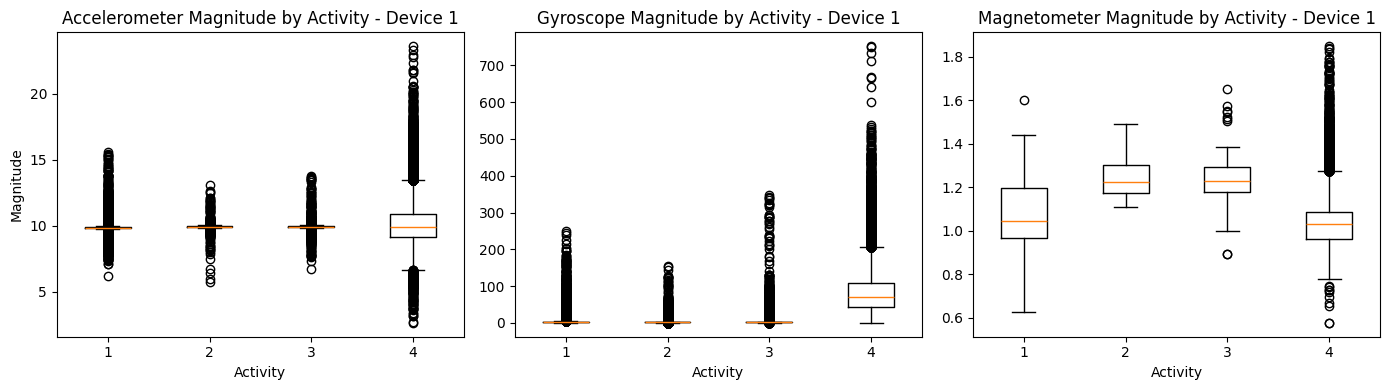

In [8]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.boxplot(accelerometer_activity)
plt.title("Accelerometer Magnitude by Activity - Device 1")
plt.xlabel("Activity")
plt.ylabel("Magnitude")

plt.subplot(1, 3, 2)
plt.boxplot(gyroscope_activity)
plt.title("Gyroscope Magnitude by Activity - Device 1")
plt.xlabel("Activity")

plt.subplot(1, 3, 3)
plt.boxplot(magnetometer_activity)
plt.title("Magnetometer Magnitude by Activity - Device 1")
plt.xlabel("Activity")

plt.tight_layout()
plt.show()


### 3.2 - Analyse and Comment the Denity of Outliers
- IQR Implementation

- Sort the lists of each sensor

In [9]:
accelerometer_activity_sorted = []

for i in range(len(accelerometer_activity)):
    sorted_values = sorted(accelerometer_activity[i])
    accelerometer_activity_sorted.append(sorted_values)

gyroscope_activity_sorted = []

for i in range(len(gyroscope_activity)):
    sorted_values = sorted(gyroscope_activity[i])
    gyroscope_activity_sorted.append(sorted_values)


magnetometer_activity_sorted = []

for i in range(len(magnetometer_activity)):
    sorted_values = sorted(magnetometer_activity[i])
    magnetometer_activity_sorted.append(sorted_values)

- Lenght of each sensor list

In [10]:
len_accelerometer = []

for i in range(len(accelerometer_activity_sorted)):
    len_accelerometer.append(len(accelerometer_activity_sorted[i]))


len_gyroscope = []

for i in range(len(gyroscope_activity_sorted)):
    len_gyroscope.append(len(gyroscope_activity_sorted[i]))


len_magnetometer = []

for i in range(len(magnetometer_activity_sorted)):
    len_magnetometer.append(len(magnetometer_activity_sorted[i]))


print("Accelerometer: ",len_accelerometer)
print("Gyroscope: ",len_gyroscope)
print("Magnetometer: ",len_magnetometer)

Accelerometer:  [162125, 85632, 83584, 141342]
Gyroscope:  [162125, 85632, 83584, 141342]
Magnetometer:  [162125, 85632, 83584, 141342]


- Calculation of Q1 and Q3 for each sensor (accelerometer/gyroscope/magnetometer) for each activity

In [11]:
Q1_acc = []
Q3_acc = []

for i in range(len(accelerometer_activity_sorted)):
    values = accelerometer_activity_sorted[i]     
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_acc.append(Q1_val)
    Q3_acc.append(Q3_val)


Q1_gyr = []
Q3_gyr = []

for i in range(len(gyroscope_activity_sorted)):
    values = gyroscope_activity_sorted[i]
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_gyr.append(Q1_val)
    Q3_gyr.append(Q3_val)


Q1_mag = []
Q3_mag = []

for i in range(len(magnetometer_activity_sorted)):
    values = magnetometer_activity_sorted[i]
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_mag.append(Q1_val)
    Q3_mag.append(Q3_val)


In [12]:
print("Q1 (acc): ",Q1_acc," Q3 (acc): ",Q3_acc)
print("Q1 (gyr): ",Q1_gyr," Q3 (gyr): ",Q3_gyr)
print("Q1 (mag): ",Q1_mag," Q3 (mag): ",Q3_mag)

Q1 (acc):  [9.819646410640253, 9.901181647157069, 9.883672002095173, 9.179633085362125]  Q3 (acc):  [9.870302200687677, 9.969197738113133, 9.940777034517975, 10.89105599130694]
Q1 (gyr):  [1.3965113863838314, 1.1622591618481655, 1.2700557673988524, 42.23248137752593]  Q3 (gyr):  [2.6834860928961377, 1.5489879470143055, 1.9141148821648422, 107.80765056800097]
Q1 (mag):  [0.9656947954601289, 1.1714641708767508, 1.1757712458930947, 0.9603195538311597]  Q3 (mag):  [1.1962697774540487, 1.301677157093859, 1.2948422088894886, 1.0854070396053244]


- IQR (lower and upper interval)

In [13]:
k = 1.5 

IQR_acc = [Q3_acc[i] - Q1_acc[i] for i in range(len(Q1_acc))]
lower_acc = [Q1_acc[i] - k * IQR_acc[i] for i in range(len(IQR_acc))]
upper_acc = [Q3_acc[i] + k * IQR_acc[i] for i in range(len(IQR_acc))]

IQR_gyr = [Q3_gyr[i] - Q1_gyr[i] for i in range(len(Q1_gyr))]
lower_gyr = [Q1_gyr[i] - k * IQR_gyr[i] for i in range(len(IQR_gyr))]
upper_gyr = [Q3_gyr[i] + k * IQR_gyr[i] for i in range(len(IQR_gyr))]

IQR_mag = [Q3_mag[i] - Q1_mag[i] for i in range(len(Q1_mag))]
lower_mag = [Q1_mag[i] - k * IQR_mag[i] for i in range(len(IQR_mag))]
upper_mag = [Q3_mag[i] + k * IQR_mag[i] for i in range(len(IQR_mag))]


In [14]:
print(lower_acc,upper_acc)
print(lower_gyr,upper_gyr)
print(lower_mag,upper_mag)

[9.743662725569116, 9.799157510722972, 9.798014453460969, 6.612498726444903] [9.946285885758812, 10.071221874547229, 10.026434583152177, 13.458190350224163]
[-0.533950673384628, 0.5821659840989554, 0.30396709524986776, -56.13027240818663] [4.613948152664597, 2.1290811247635157, 2.8802035543138267, 206.17040435371354]
[0.6198323224692492, 0.9761446915510885, 0.9971648013985037, 0.7726883251699128] [1.5421322504449284, 1.4969966364195213, 1.4734486533840796, 1.2730382682665713]


Points that were classificated as outliers

In [15]:
outliers_acc = []

for i, values in enumerate(accelerometer_activity_sorted):
    outliers_i = [v for v in values if v < lower_acc[i] or v > upper_acc[i]]
    outliers_acc.append(outliers_i)

outliers_gyr = []
for i, values in enumerate(gyroscope_activity_sorted):
    outliers_i = [v for v in values if v < lower_gyr[i] or v > upper_gyr[i]]
    outliers_gyr.append(outliers_i)

outliers_mag = []
for i, values in enumerate(magnetometer_activity_sorted):
    outliers_i = [v for v in values if v < lower_mag[i] or v > upper_mag[i]]
    outliers_mag.append(outliers_i)

In [16]:
nr_outliers_acc = [len(outliers) for outliers in outliers_acc]
nr_outliers_gyr = [len(outliers) for outliers in outliers_gyr]
nr_outliers_mag = [len(outliers) for outliers in outliers_mag]

print("Número de outliers em acelerómetro (para cada atividade): ",nr_outliers_acc)
print("Número de outliers em giroscópio (para cada atividade): ",nr_outliers_gyr)
print("Número de outliers em magnetómetro (para cada atividade): ",nr_outliers_mag)

Número de outliers em acelerómetro (para cada atividade):  [9047, 532, 3285, 4556]
Número de outliers em giroscópio (para cada atividade):  [15149, 5448, 8188, 2691]
Número de outliers em magnetómetro (para cada atividade):  [1, 0, 9, 1541]


Outliers Density
- density = (nº of points classified as outliers/nº total points)*100

In [17]:
density_accelerometer = [(nr_outliers_acc[i] / len_accelerometer[i]) * 100 for i in range(len(nr_outliers_acc))]

density_gyroscope = [(nr_outliers_gyr[i] / len_gyroscope[i]) * 100 for i in range(len(nr_outliers_gyr))]

density_magnetometer = [(nr_outliers_mag[i] / len_magnetometer[i]) * 100 for i in range(len(nr_outliers_mag))]

print("Densidade de outliers do acelerómetro: ",density_accelerometer)
print("Densidade de outliers do giroscópio: ",density_gyroscope)
print("Densidade de outliers do magnetómetro: ",density_magnetometer)

Densidade de outliers do acelerómetro:  [5.5802621434078645, 0.6212630792227205, 3.930178024502297, 3.223387245121762]
Densidade de outliers do giroscópio:  [9.34402467232074, 6.362107623318386, 9.796133231240429, 1.9038926858258691]
Densidade de outliers do magnetómetro:  [0.0006168080185042406, 0.0, 0.01076761102603369, 1.0902633329088312]


### 3.3 - Z-Score Implementation

In [18]:
def zscore_sensor(sensor_data, k=3):

    z_scores_sensor = []
    outliers_sensor = []
    nr_outliers = []

    for values in sensor_data:
        n = len(values)
        if n == 0:
            z_scores_sensor.append([])
            outliers_sensor.append([])
            nr_outliers.append(0)
            continue

        mean = sum(values) / n
        variance = sum((x - mean) ** 2 for x in values) / n
        std_deviation = variance ** 0.5

        if std_deviation == 0:
            z_scores_sensor.append([0] * n)
            outliers_sensor.append([])
            nr_outliers.append(0)
            continue

        z_scores = [(x - mean) / std_deviation for x in values]
        outliers = [values[i] for i, z in enumerate(z_scores) if abs(z) > k]

        z_scores_sensor.append(z_scores)
        outliers_sensor.append(outliers)
        nr_outliers.append(len(outliers))

    return z_scores_sensor, outliers_sensor, nr_outliers


- Z-Score (K=3)

In [19]:
z_acc, out_acc, nr_out_acc = zscore_sensor(accelerometer_activity_sorted, k=3)
z_gyr, out_gyr, nr_out_gyr = zscore_sensor(gyroscope_activity_sorted, k=3)
z_mag, out_mag, nr_out_mag = zscore_sensor(magnetometer_activity_sorted, k=3)

print("Outliers do acelerómetro:", nr_out_acc)
print("Outliers do giroscópio:", nr_out_gyr)
print("Outliers do magnetómetro:", nr_out_mag)


Outliers do acelerómetro: [1401, 236, 523, 1530]
Outliers do giroscópio: [1963, 341, 434, 1329]
Outliers do magnetómetro: [8, 2, 10, 961]


- Z-Scpre (k=1.5)

In [20]:
z_acc, out_acc, nr_out_acc = zscore_sensor(accelerometer_activity_sorted, k=1.5)
z_gyr, out_gyr, nr_out_gyr = zscore_sensor(gyroscope_activity_sorted, k=1.5)
z_mag, out_mag, nr_out_mag = zscore_sensor(magnetometer_activity_sorted, k=1.5)

print("Outliers do acelerómetro:", nr_out_acc)
print("Outliers do giroscópio:", nr_out_gyr)
print("Outliers do magnetómetro:", nr_out_mag)


Outliers do acelerómetro: [2841, 1480, 1880, 15859]
Outliers do giroscópio: [3690, 597, 834, 13129]
Outliers do magnetómetro: [7706, 8163, 7018, 16489]


### 3.4 - Plot of Outliers using Z-Score (k=3, 3.5 and 4)

- Plot function (Accelerometer)


--- k = 3 ---
Stand: 1401 outliers
Sit: 236 outliers
Sit and Talk: 523 outliers
Walk: 1530 outliers


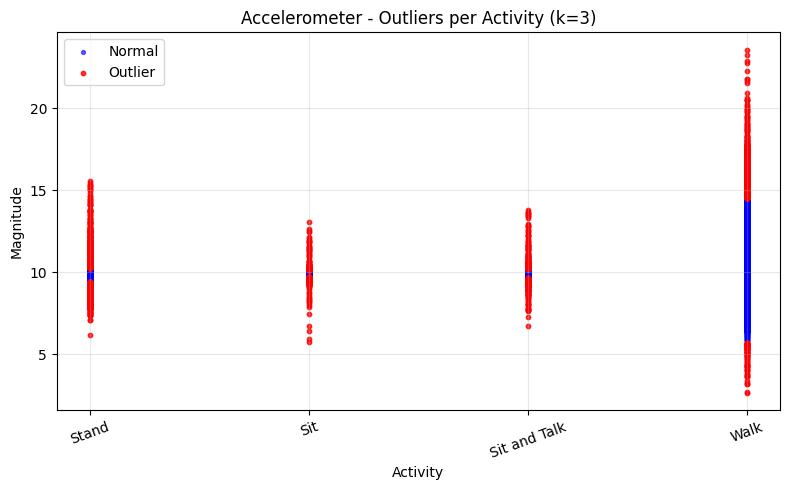


--- k = 3.5 ---
Stand: 1201 outliers
Sit: 182 outliers
Sit and Talk: 438 outliers
Walk: 700 outliers


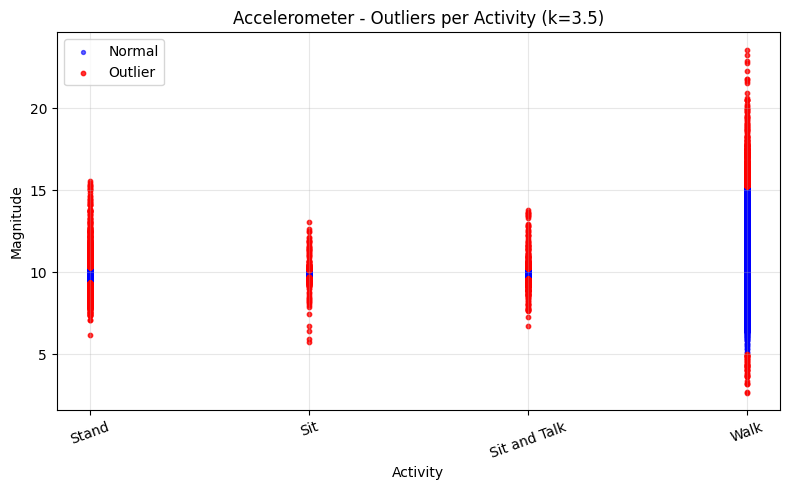


--- k = 4 ---
Stand: 1047 outliers
Sit: 150 outliers
Sit and Talk: 367 outliers
Walk: 368 outliers


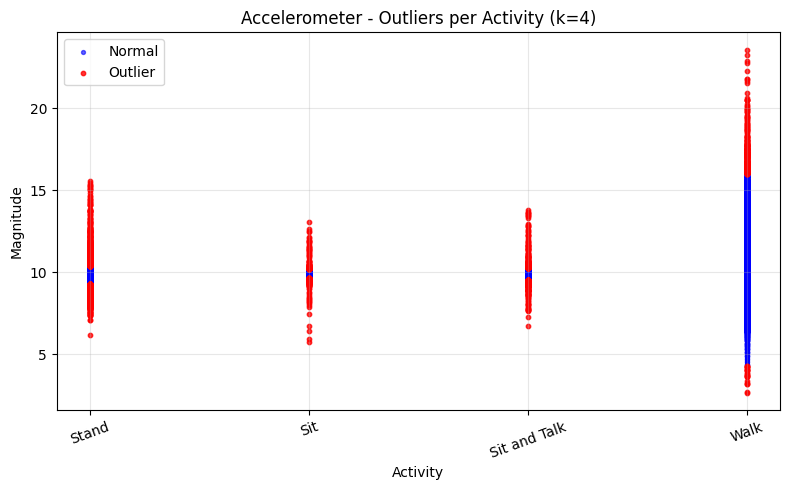

In [21]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_acc[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Accelerometer - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_acc[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


- Plot function (Gyroscope)


--- k = 3 ---
Stand: 1963 outliers
Sit: 341 outliers
Sit and Talk: 434 outliers
Walk: 1329 outliers


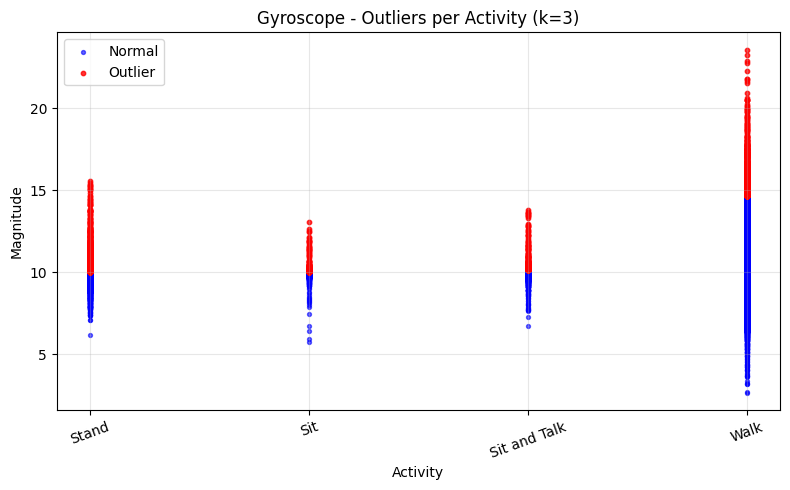


--- k = 3.5 ---
Stand: 1681 outliers
Sit: 304 outliers
Sit and Talk: 370 outliers
Walk: 712 outliers


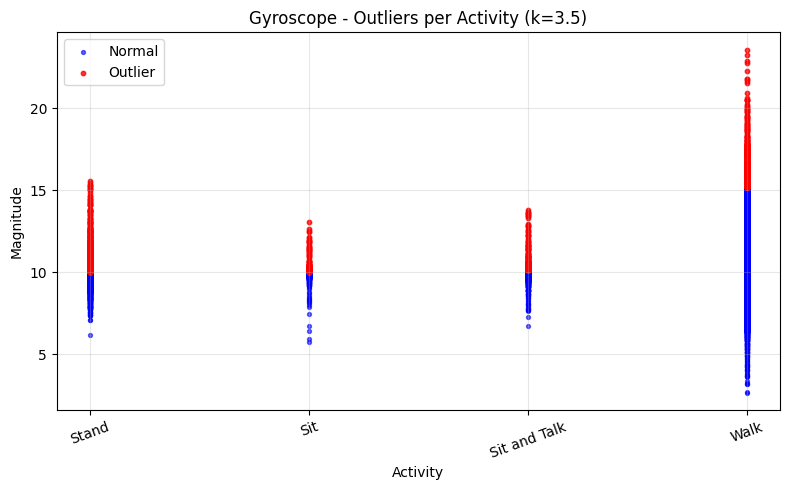


--- k = 4 ---
Stand: 1461 outliers
Sit: 276 outliers
Sit and Talk: 329 outliers
Walk: 437 outliers


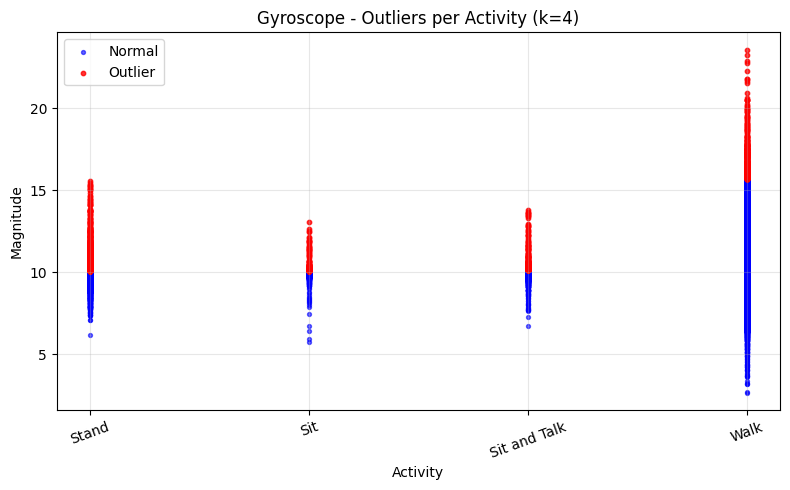

In [22]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_gyr[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Gyroscope - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_gyr[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


- Plot function (Magnetometer)


--- k = 3 ---
Stand: 8 outliers
Sit: 2 outliers
Sit and Talk: 10 outliers
Walk: 961 outliers


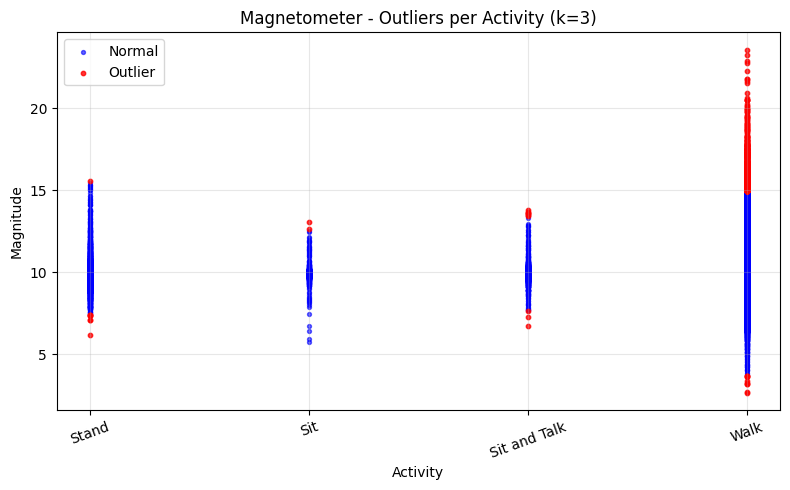


--- k = 3.5 ---
Stand: 6 outliers
Sit: 2 outliers
Sit and Talk: 10 outliers
Walk: 485 outliers


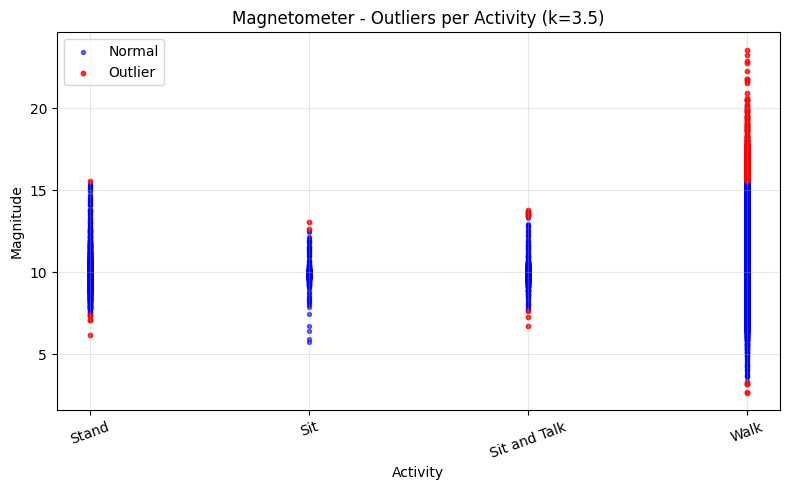


--- k = 4 ---
Stand: 1 outliers
Sit: 0 outliers
Sit and Talk: 9 outliers
Walk: 249 outliers


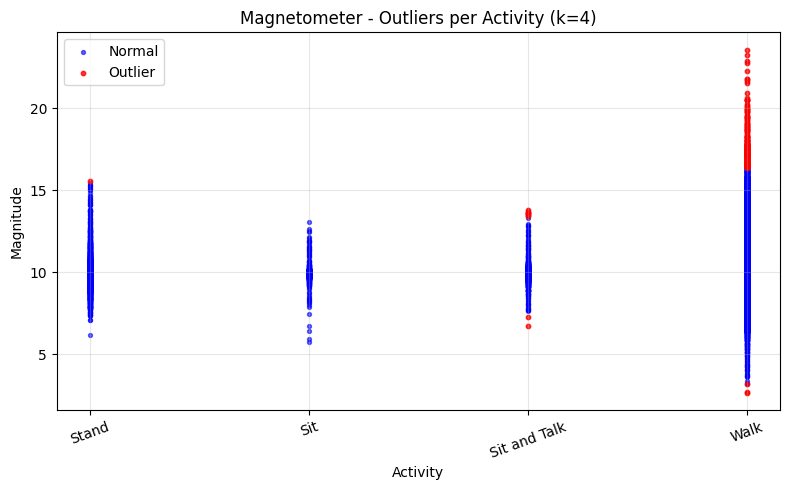

In [23]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_mag[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Magnetometer - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_mag[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


### 3.5 - Compare the results obtained on 3.1 and 3.4 and the outliers density (IQR vs Z-Score)

In [29]:
for i, valores in enumerate(accelerometer_activity_sorted):
    out_z = [idx for idx, z in enumerate(z_acc[i]) if abs(z) > 3]
    out_iqr = [idx for idx, v in enumerate(valores)
               if v < lower_acc[i] or v > upper_acc[i]]

    intersec = len(set(out_z) & set(out_iqr))
    only_z = len(set(out_z) - set(out_iqr))
    only_iqr = len(set(out_iqr) - set(out_z))

    print(f"Atividade {i+1}:")
    print(f"  Outliers comuns: {intersec}")
    print(f"  Só Z-Score: {only_z}")
    print(f"  Só Boxplot: {only_iqr}")


Atividade 1:
  Outliers comuns: 1401
  Só Z-Score: 0
  Só Boxplot: 7646
Atividade 2:
  Outliers comuns: 236
  Só Z-Score: 0
  Só Boxplot: 296
Atividade 3:
  Outliers comuns: 523
  Só Z-Score: 0
  Só Boxplot: 2762
Atividade 4:
  Outliers comuns: 1530
  Só Z-Score: 0
  Só Boxplot: 3026


### 3.6 - K-Means Implementation

In [33]:
def k_means(data, k, max_iters=100):
    data = np.array(data)
    
    centroids = np.random.choice(data, k, replace=False)
    
    for _ in range(max_iters):
        distances = np.abs(data[:, np.newaxis] - centroids)
        labels = np.argmin(distances, axis=1)
        
        old_centroids = centroids.copy()
        
        for i in range(k):
            if np.any(labels == i):
                centroids[i] = np.mean(data[labels == i])
        
        if np.allclose(centroids, old_centroids):
            break

    return centroids, labels